In [1]:
from GAN import Generator, Discriminator
import torch
import numpy as np
import matplotlib.pyplot as plt

from Signal_Generator import *
from Signal_Analyzer import *

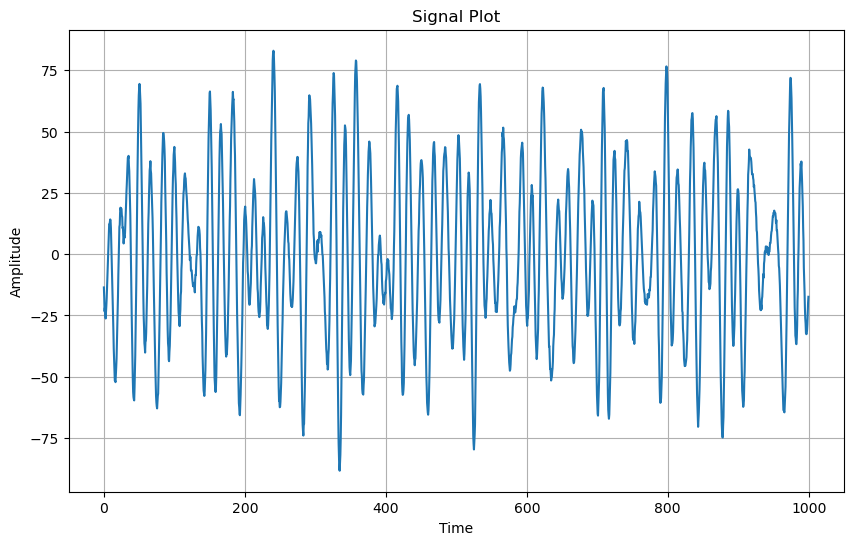

In [6]:
CSG = Clean_Signal_Generator(num_sources=10)
clean_signal = CSG.generating_signal(amp_uselog=True)

NG = Noise_Generator(noise_amplitude=1)
noise = NG.generate_noise()

combined_signal = Signal_Analyzer.combine_signals(clean_signal, noise)
Signal_Analyzer.plot_signal(combined_signal, column='Combined_Signal')

In [12]:
combined_signal['Combined_Signal']

0      -13.556733
1      -17.705239
2      -23.339967
3      -21.820932
4      -24.853435
          ...    
1995   -31.155600
1996   -28.596535
1997   -23.750319
1998   -19.797147
1999   -17.369906
Name: Combined_Signal, Length: 2000, dtype: float64

In [14]:
t = np.linspace(0, 1, 1000)

num_latent_variables = 10

z = torch.randn(1, num_latent_variables, 1)

input_signal = combined_signal['Combined_Signal'].values
input_signal_tensor = torch.tensor(input_signal, dtype=torch.float).unsqueeze(0).unsqueeze(0)

# Initialize the generator
generator = Generator(in_channels=1, num_latent_variables=num_latent_variables, length=1000)

# Generate the signal with the corrected generator
with torch.no_grad():
    generated_params = generator(input_signal_tensor, z).squeeze().numpy()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x128000 and 64000x3)

In [ ]:
t = np.linspace(0, 1, 1000)

num_latent_variables = 10

z = torch.randn(1, num_latent_variables, 1)


amplitude_range=(0.5, 1.5)
phase_range=(0, np.pi)
frequency_range=(1, 5)

amplitude = np.random.uniform(*amplitude_range)
phase = np.random.uniform(*phase_range)
frequency = np.random.uniform(*frequency_range) 

input_signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
input_signal_tensor = torch.tensor(input_signal, dtype=torch.float).unsqueeze(0).unsqueeze(0)

# Initialize the generator
generator = Generator(in_channels=1, num_latent_variables=num_latent_variables, length=1000)

# Generate the signal with the corrected generator
with torch.no_grad():
    generated_params = generator(input_signal_tensor, z).squeeze().numpy()

In [3]:
generated_params

array([ 0.04214858, -0.07050233,  0.17444995], dtype=float32)

In [4]:
discriminator = Discriminator(input_channels=1, num_latent_variables=num_latent_variables)

with torch.no_grad():
    input_signal_tensor = torch.tensor(input_signal, dtype=torch.float).unsqueeze(0).unsqueeze(0)
    generated_params_tensor = torch.tensor(generated_params, dtype=torch.float).unsqueeze(0)
    discriminator_output_generated = discriminator(input_signal_tensor, generated_params_tensor, z)

    discriminator_output_input = discriminator(input_signal_tensor, generated_params_tensor, z)

print(discriminator_output_generated.item())
print(discriminator_output_input.item())

0.5431119799613953
0.5431119799613953
